In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 6

import os
from sklearn.linear_model import lasso_path, enet_path, LogisticRegression
from sklearn.linear_model import ElasticNetCV, ElasticNet, Lasso, LassoCV, Ridge, RidgeCV, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error,mean_absolute_error,r2_score

from scipy.stats.stats import pearsonr

import statsmodels.api as sm
import warnings
import itertools
#from sklearn.cross_validation import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib.pylab import rcParams

In [2]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)

In [7]:
file = []
for i in file_list:
    data = pd.read_csv('gt_f/'+i,index_col='Week')
    data.index = pd.DatetimeIndex(data.index)
    file.append(data)
features = file[0]
for i in range(1,len(file)):
    features = features.join(file[i])

In [8]:
file_list = os.listdir('gt_f')

In [9]:
#x_path = '/Users/yaowangyi/Desktop/data/gt_features/x_gt_data.xlsx'
y_path = '/Users/yaowangyi/Desktop/data/gt_features/y_gastroenteritis_eng.csv'

gt_data = features

In [10]:
rcgp_data = pd.read_csv(y_path,index_col='week')
time_line = pd.date_range('2004-01-04',freq='7D', periods=657)
rcgp_data.index = time_line

In [11]:
#Correlation coefficient for features with RCGP data
corr_tab = rcgp_data.join(gt_data).corr()
#corr_tab
corr_tab.shape

(63, 63)

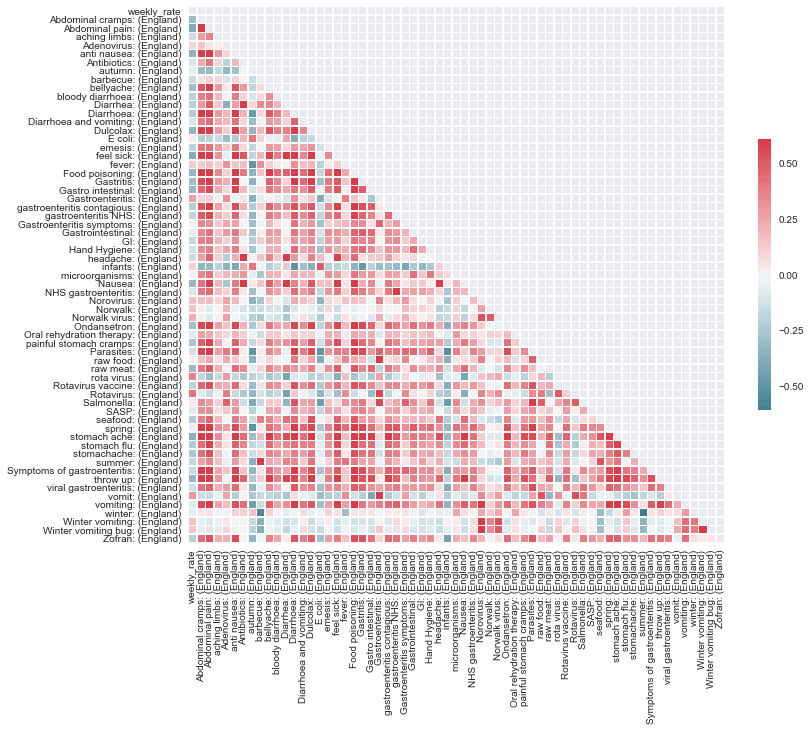

In [12]:
import seaborn as sns
%matplotlib inline
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_tab, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_tab, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
